In [2]:
from osgeo import ogr

In [3]:
path = 'E:\\YNU\\5\\OpenSourceGIS\\Act_4\\OnClass\\kunming_wgs84.gpkg'
path_out = 'E:\\YNU\\5\\OpenSourceGIS\\Act_4\\OnClass\\kunming_utm48.gpkg'

## 投影转换的步骤
1. 读入矢量数据
2. 创建新的空间参考
3. 创建写出数据及矢量图层
4. 创建转换对象，并进行投影转换

In [4]:
utm_epsg = 32648
## 1.读入矢量数据
in_ds = ogr.Open(path)
in_layer = in_ds.GetLayer(0)

## 2. 创建新的空间参考
utm_srs = ogr.osr.SpatialReference()
utm_srs.ImportFromEPSG(utm_epsg)

## 3. 创建写出数据及矢量图层
driver = ogr.GetDriverByName('GPKG')
out_ds = driver.CreateDataSource(path_out)
out_layer = out_ds.CreateLayer('kunming_utm48', geom_type = ogr.wkbPolygon, srs = utm_srs)

## 4. 创建转换对象，并进行投影转换
spatialRef = in_layer.GetSpatialRef()
cor_transform = ogr.osr.CoordinateTransformation(spatialRef, utm_srs)
print(cor_transform)

for i in range(in_layer.GetFeature(1).GetFieldCount()):
    field_defn = in_layer.GetFeature(1).GetFieldDefnRef(i)
    out_layer.CreateField(field_defn)


fea_defn = in_layer.GetLayerDefn()
for i in range(in_layer.GetFeatureCount()):
    in_fea = in_layer.GetFeature(i+1) # 提取要素
    in_geo = in_fea.geometry() # 提取要素的几何
    in_geo.Transform(cor_transform) # 参数为最初创造的***
    out_fea = ogr.Feature(fea_defn) # 创建要素，以最初获取的作为参数
    out_fea.SetGeometry(in_geo)
    for j in range(fea_defn.GetFieldCount()):
        field_value = in_fea.GetField(j) # 提取字段值
        out_fea.SetField(j, field_value) # (索引，对应索引的字段值)
    out_layer.CreateFeature(out_fea)

ds = None
out_ds = None

<osgeo.osr.CoordinateTransformation; proxy of <Swig Object of type 'OSRCoordinateTransformationShadow *' at 0x000001DC57DED200> >


e:\anaconda3\envs\geoenv\Lib\site-packages\osgeo\ogr.py:601: FutureWarning: Neither ogr.UseExceptions() nor ogr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [5]:
path_utm = 'E:\\YNU\\5\\OpenSourceGIS\\Act_4\\OnClass\\kunming_utm48.gpkg'

In [6]:
ds = ogr.Open(path_utm, 1)
layer = ds.GetLayer(0)
id_field = layer.GetFeature(1).GetFieldIndex('dt_adcode') # 要删除的字段名
layer.DeleteField(id_field)
ds = None

In [7]:
ds = ogr.Open(path_utm, 1)
layer = ds.GetLayer(0)
field_defn = ogr.FieldDefn('Area(km2)', ogr.OFTReal)
layer.CreateField(field_defn)
area_dt, dt_name = [], []
for i in range(layer.GetFeatureCount()):
    fea = layer.GetFeature(i+1)
    fea_area = fea.geometry().Area()
    fea_area = fea_area / 1000000
    area_dt.append(fea_area)
    fea_name = fea.GetField('dt_name')
    dt_name.append(fea_name)
    print(fea_area)
    fea.SetField('Area(km2)', fea_area)
    layer.SetFeature(fea)
ds = None

388.68132965333547
864.295296736931
638.33361729476
887.0758120914002
1866.1175875335928
499.36396388766826
1338.5644973111446
994.1854960593394
1914.092175416861
1681.4133762503427
828.4756858595103
4227.121468713026
3598.3429000372294
1301.1314514651406


<BarContainer object of 14 artists>

C:\Users\Yihao Sun\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Yihao Sun\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Yihao Sun\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Yihao Sun\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Yihao Sun\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F99}) missing from 

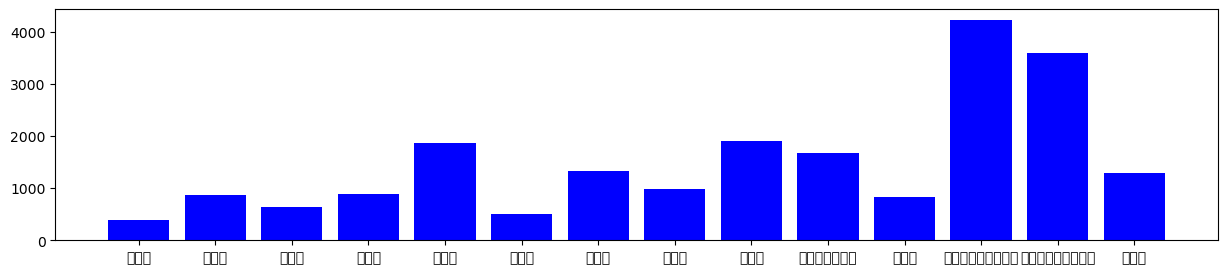

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (15, 3))
ax.bar(dt_name, area_dt, color = 'blue')

In [9]:
path = 'E:\\YNU\\5\\OpenSourceGIS\\Act_4\\OnClass\\kunming_wgs84_centroid.gpkg'
in_ds = ogr.Open(path_utm, 0)
in_layer = in_ds.GetLayer(0)

in_SpatialRef = in_layer.GetSpatialRef()
driver = ogr.GetDriverByName('GPKG')
out_ds = driver.CreateDataSource(path)

out_layer = out_ds.CreateLayer('kunming_wgs84_centroid',geom_type = ogr.wkbPoint, srs = in_SpatialRef)

field_defn = ogr.FieldDefn('fid', ogr.OFTInteger)
out_layer.CreateField(field_defn)

out_fea_defn = out_layer.GetLayerDefn() #获得要素定义

for i in range(in_layer.GetFeatureCount()):
    in_fea = in_layer.GetFeature(i+1)
    out_geo = in_fea.geometry().Centroid()
    out_fea = ogr.Feature(out_fea_defn)
    out_fea.SetGeometry(out_geo)
    out_fea.SetField('fid', i+1)
    out_layer.CreateFeature(out_fea)
ds = None
out_ds = None